###**Hyperparameter Tuning**

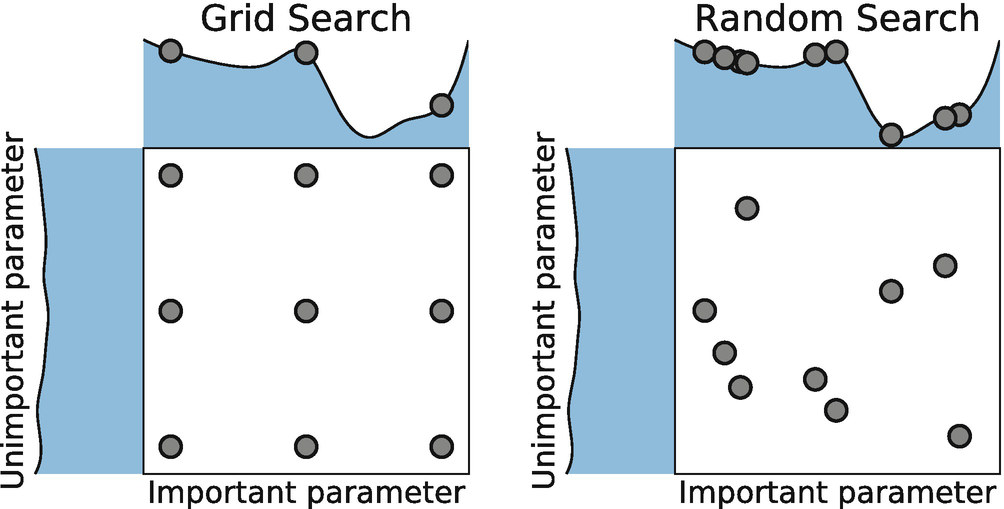

Optimización:
- Funcion Objetivo: Qué es lo que quiere optimizar (minimizar o maximizar)
- Espacio de Búsqueda o Dominio: Son los valores en los que los hiper-parámetros se van a mover. ¿Cuáles son los Hiper-parámetros?: -Parámetros del modelo, ratio de aprendizaje, la tasa de penalización o regularización, entre otras.
- Algoritmo de Optimización: Solver.
- Historial de Resultados: Las decisiones futuras del algoritmo de optimización se tomarán en base a este historial.

###Baseline: un ejemplo de prueba / punto de comparación


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge


In [ ]:
dataset = datasets.load_diabetes()

In [ ]:
modelo_baseline = Ridge()
modelo_baseline.fit(dataset.data, dataset.target) #X , y

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

###Grid Search


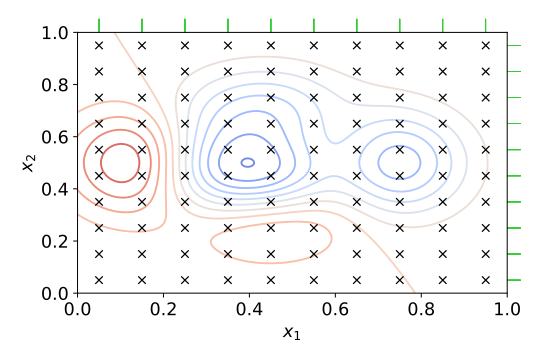

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.0002, 0]) #Especificar el espacio de búsqueda es Discreto

In [ ]:
modelo_grid = Ridge()
grid = GridSearchCV(estimator= modelo_grid, param_grid= dict(alpha = alphas))

In [ ]:
grid.fit(dataset.data, dataset.target)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 2.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

{'alpha': 0.0002}
0.48232652105708906
0.0002


###Random Search

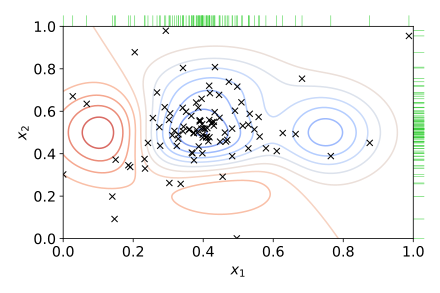

In [ ]:
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
param_random = {'alpha': sp_rand()}

In [ ]:
modelo_random = Ridge()
random = RandomizedSearchCV(estimator= modelo_random, param_distributions= param_random, n_iter=100)

In [ ]:
random.fit(dataset.data,dataset.target)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f83df4ce850>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f83df4ce850>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print(random.best_params_)
print(random.best_score_)
print(random.best_estimator_.alpha)

{'alpha': 0.002927973338027856}
0.4821203289201684
0.002927973338027856
